In [1]:
# %%writefile xxx.py

import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)

import numpy as np
import pandas as pd

import QUANTAXIS as QA

import tools.Sample_Tools as smpl
from base.JuUnits import excute_for_multidates

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker





In [18]:
from tools.Cacher import (CACHE_TYPE, save_cache,load_cache_adv,load_cache)

tail = False
if tail:
    file = 'all_tail_qfq'
else:
    file = 'all_train_qfq'
    
df_all = load_cache(file,cache_type=CACHE_TYPE.STOCK).sort_index()
smpl.optimize_data_type(df_all)

data_ = df_all

# year = '2020'
# data_ = df_all.loc[year+'-01-03':year+'-12-28']
codes = data_.index.get_level_values(1).unique()
dates = data_.index.get_level_values(0).unique()


ret = smpl.get_forward_return(data_,'close')
ret.name = 'ret_forward'
ret[np.abs(ret)>0.15]=np.nan




In [19]:
# # 开盘冲高：log(盘高/开盘价)。该指标越大，股票盘中冲高幅度越大。
# high_op = np.log(data_.high/data_.open)
# # 盘低回升：log(收盘价/盘低)。该指标越大，股票从盘低回升的幅度也就越大。
# close_low = np.log(data_.close/data_.low)
# # 均价偏离：log(均价/收盘价)。该指标体现了股票成交均价相对于收盘价的偏离。
# vwap_close = np.log((data_.amount/(data_.volume*100))/data_.close)


# 偏度
# skewness = 1/n sum( （（日收益-日收益均值）/日收益方差）^3 ) # 进一步，可以是特异收益率的偏度进

#隔夜价缺口，开盘跳空信号 价格缺口 =  open_t /close_t-1 -1  !!好东西
overnight_gap = excute_for_multidates(data_, lambda stock:(stock.open / stock.close.shift(1)) - 1, level=1).sort_index()


date        code  
2017-01-03  000001         NaN
            000002         NaN
            000004         NaN
            000006         NaN
            000007         NaN
                        ...   
2017-12-28  603991   -0.007951
            603993   -0.001524
            603997    0.006206
            603998    0.002674
            603999   -0.020725
Length: 560808, dtype: float32

In [ ]:
# 其他价格缺口应用
# 今日开盘价与昨日收盘价相比的收益率变动的绝对值，我们命名为jump

# 10日跳空因子

# -0.1*(jump(-9td)+jump(-8td)+jump(-7td)+jump(-6td)+jump(-5td)+jump(-4td)+jump(-3td)+jump(-2td)+jump(-1td)+jump)

# 连续10日隔夜跳空因子的平均数，此处我们取相反数，来保证F1组是低跳空组合，命名为jump_10，20日隔夜跳空因子则为jump_20

# 剔除20日跳空因子中的换手率因素

# residual_s (jump_20,1/turn_30,all)

# 用30日换手率因子的倒数对20日跳空因子做回归，取其残差为新因子



In [ ]:
# 换手率测试 流动性

# 仅以1月期因子为例，大家可以自由进行时间调整，F1组均处理为小因子值1个月换手率：1/avg_t(turnover,-22:-1,td)。
# 并命名为turn_11个月换手率标准差：1/std_t(turnover,-22:-1,td)
# 1个月换手率乖离率：avg_t(Turnover,-2:-1,y)/avg_t(turnover,-22:-1,td)
# 1个月换手率标准差乖离率：std_t(turnover,-2:-1,y)/std_t(turnover,-22:-1,TD)
# 1个月换手率中性化：residual_s_by(1/avg_t(turnover,-22:-1,td),Market_Value,csi800,sw_sector)



In [ ]:
# 动量 
# 回测日的收盘价除以1个月前的收盘价再减去1

In [ ]:
var
Cvar
ES

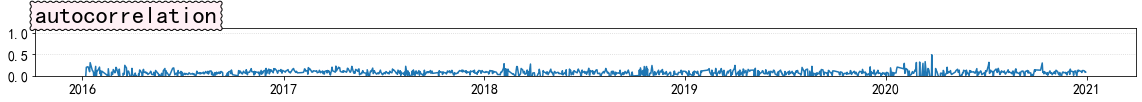

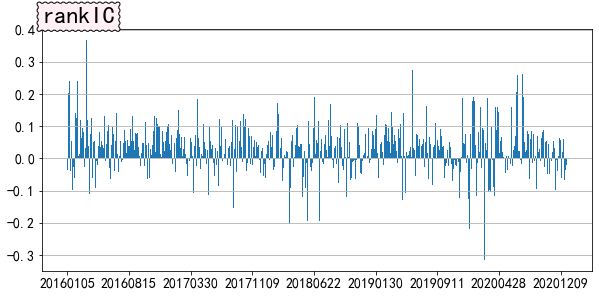

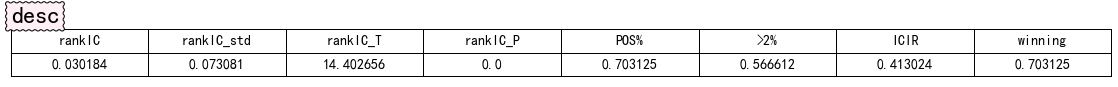

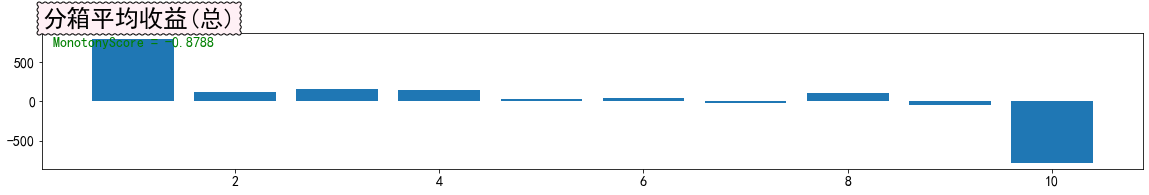

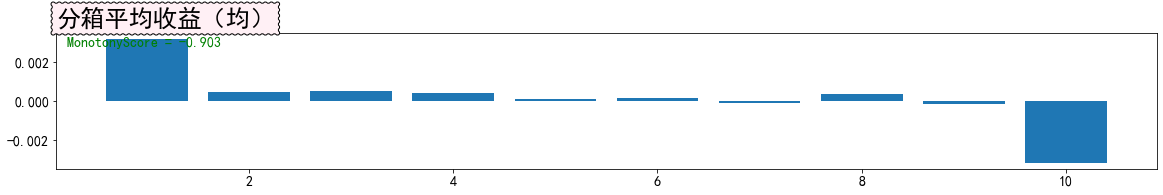

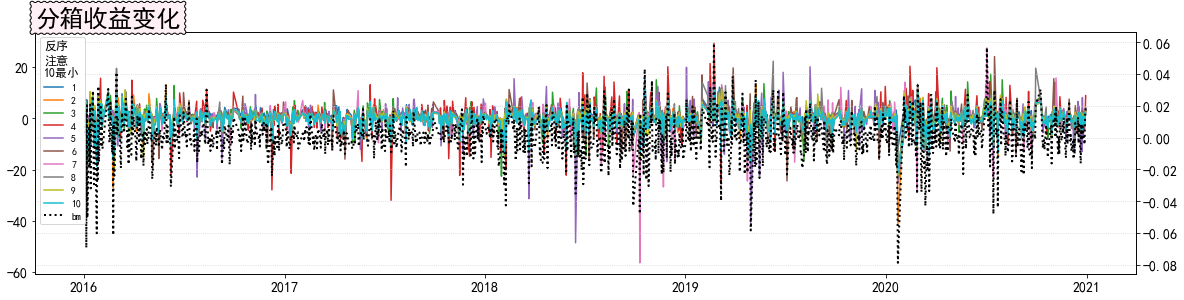

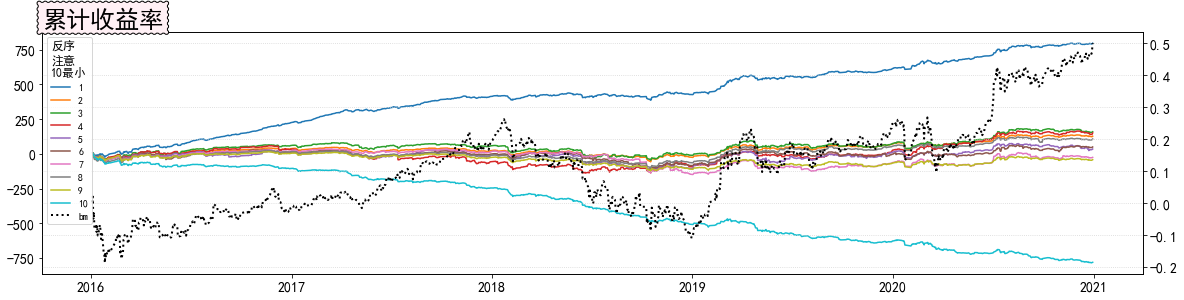

Wall time: 23.6 s


In [20]:
%%time
from tools.Test_Tools_Simple import FactorTest

# %load_ext autoreload
# %autoreload 1
# %aimport tools.Test_Tools_Simple

fa = pd.DataFrame(overnight_gap).dropna()
fa.columns=['xxx']
test = FactorTest(start=dates.min().strftime('%Y-%m-%d'),end=dates.max().strftime('%Y-%m-%d'),target_field='xxx',blenchmark_name='沪深300', freq="d")
test.process_ind_simple(fa,ret,need_descript=True)
test.plot()
